# DataFrames

## DataFrames e Séries

DataFrames são a estrutura de dados mais amplamente utilizada. Eles são uma tabela, onde cada linha representa uma "coisa" e cada coluna representa uma característica dessa coisa. 

![tabela](https://gonehybrid.com/content/images/2017/02/table.png)

No nosso último encontro, aprendemos sobre Séries. Uma Série pode ser pensada como _uma coluna_ de um DataFrame.

Hoje, vamos falar sobre DataFrames propriamente ditos.

## Importando o pandas

Em Python, para trabalharmos com séries e dataframes, precisamos importar um pacote chamado `pandas`:

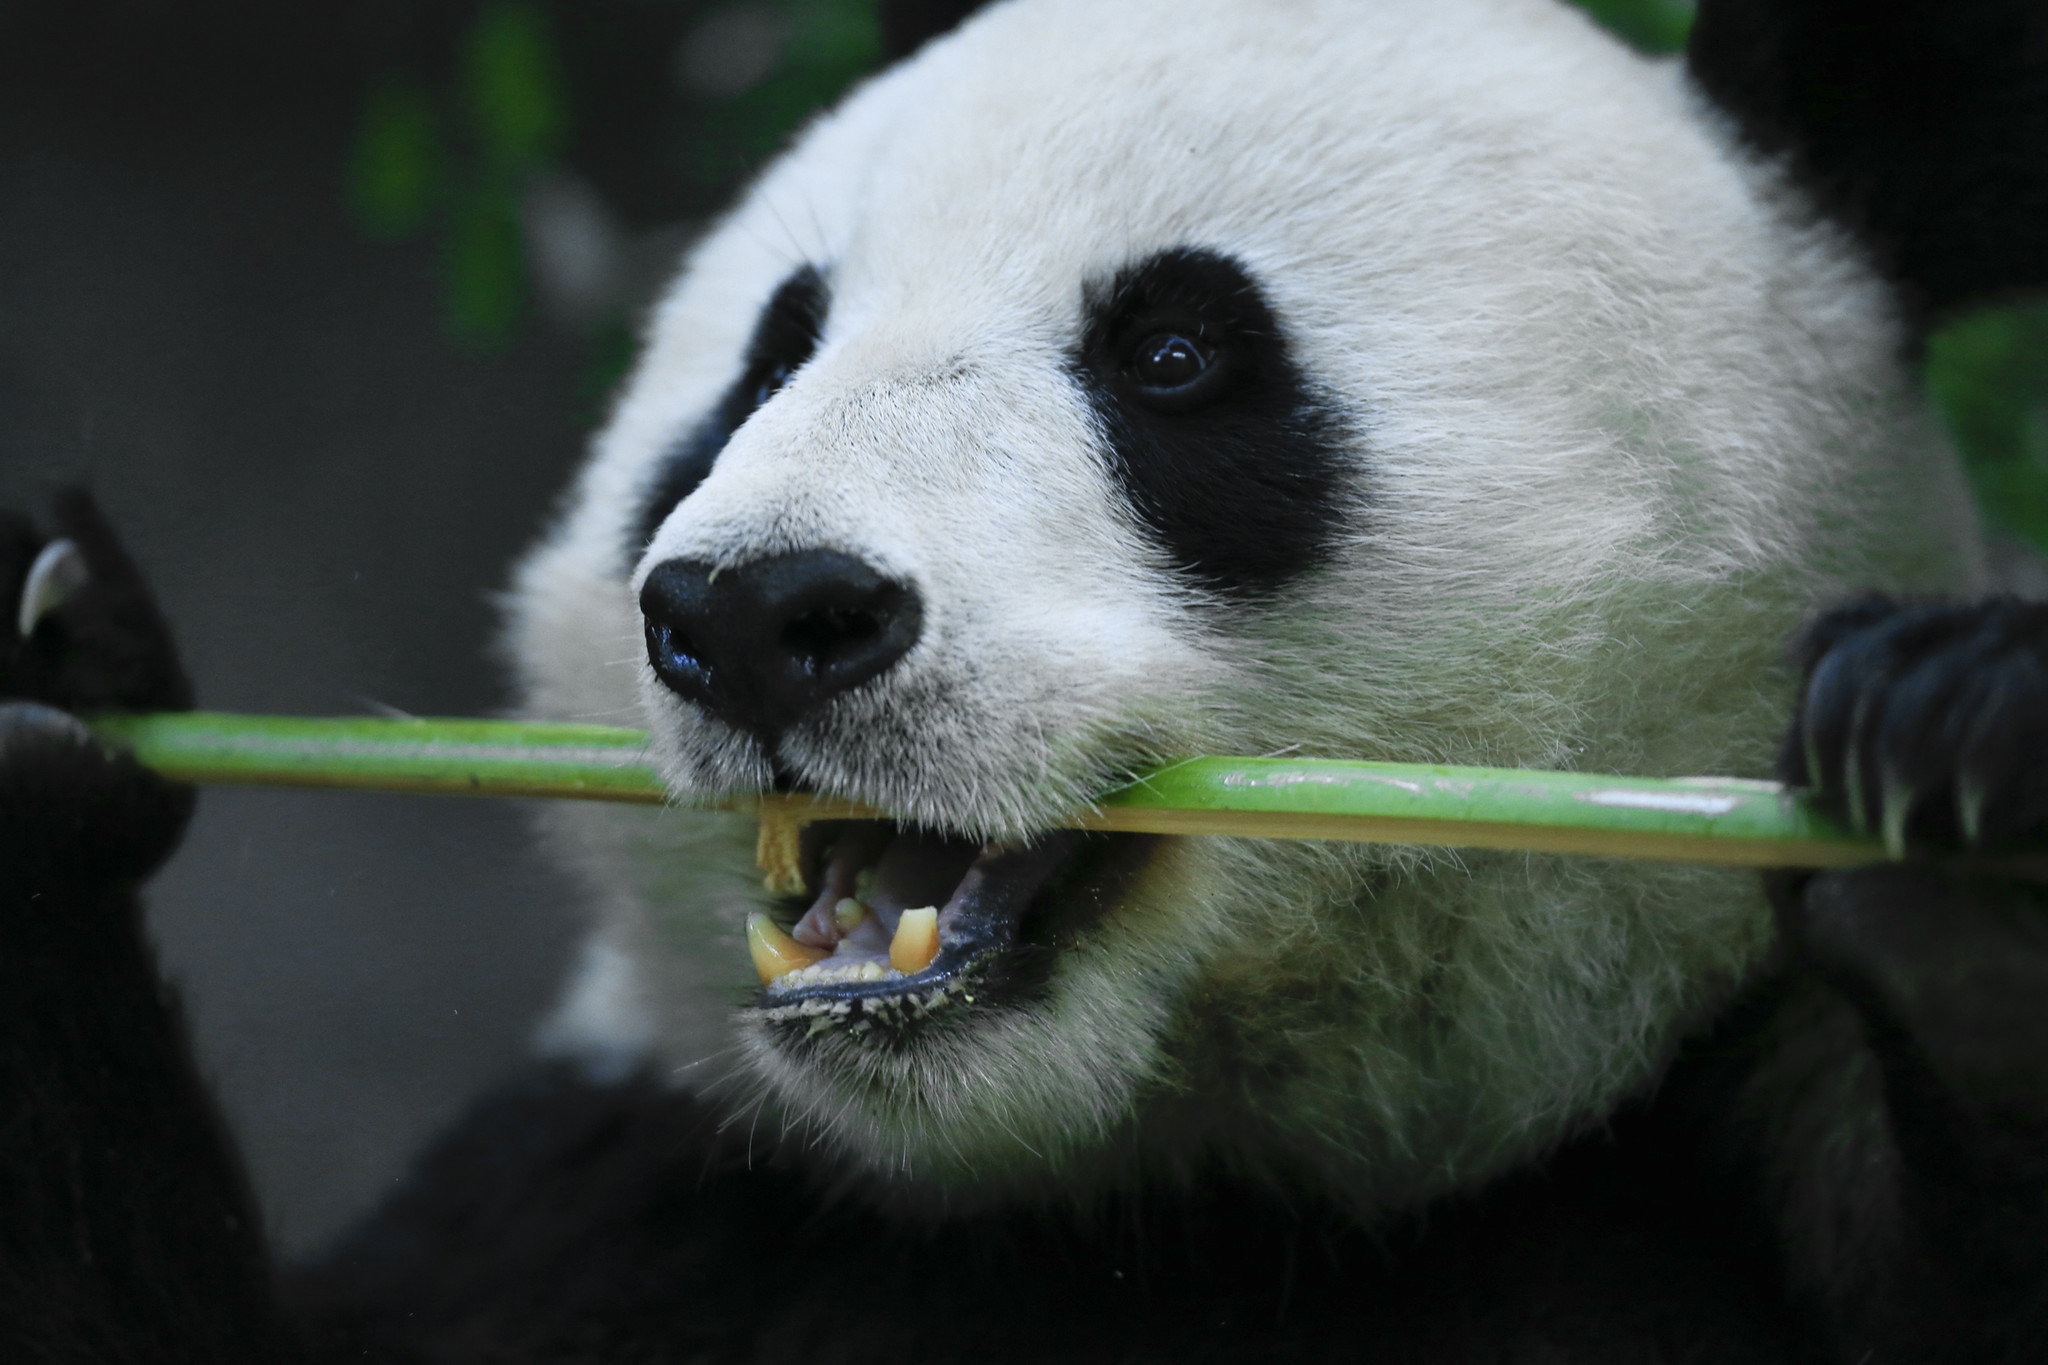

In [1]:
import pandas as pd

## Importando um DataFrame

Até agora, nós estivemos criando nossos objetos na mão. Na prática, isso raramente acontece. Quase sempre, nós importamos nossos dados de algum lugar. A função que usamos para importar os dados depende do formato em que os dados estão. Dois formatos muito utilizados são o `csv` e o `xls` (ou `xlsx`). Para ler um arquivo em csv, usamos a função `read_csv`. Para ler um arquivo em xls (ou xlsx), usamos a função `read_excel`. Para outros formatos, veja [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

Em `pandas`, nós podemos ler um arquivo diretamente de um site na internet. Não é preciso fazer o download do arquivo:

In [2]:
mundo = pd.read_csv('https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/world-small.csv')
mundo

country        region  gdppcap08  polityIV
0      Albania    C&E Europe       7715      17.8
1      Algeria        Africa       8033      10.0
2       Angola        Africa       5899       8.0
3    Argentina    S. America      14333      18.0
4      Armenia    C&E Europe       6070      15.0
..         ...           ...        ...       ...
140  Venezuela    S. America      12804      16.0
141    Vietnam  Asia-Pacific       2785       3.0
142      Yemen   Middle East       2400       8.0
143     Zambia        Africa       1356      15.0
144   Zimbabwe        Africa        188       6.0

[145 rows x 4 columns]

## Índices

Uma Série tem um conjunto de índices que identificam cada linha.  
Um DataFrame também tem **2** conjuntos de índices: um para identificar cada **linha** e outro para identificar cada **coluna**.

* O índice que identifica as linhas pode ser acessado usando o método `.index`.
* O índice que identifica as colunas pode ser acessado usando o método `.columns`.


In [3]:
mundo.index

RangeIndex(start=0, stop=145, step=1)

In [4]:
mundo.columns

Index(['country', 'region', 'gdppcap08', 'polityIV'], dtype='object')

O índice de linhas não me diz muita coisa nesse caso. Seria mais útil identificar cada linha pelo país ao qual ele se refere. Podemos escolher o país para ser o índice do DataFrame usando o método `.set_index`:

In [5]:
mundo = mundo.set_index('country')
mundo

region  gdppcap08  polityIV
country                                     
Albania      C&E Europe       7715      17.8
Algeria          Africa       8033      10.0
Angola           Africa       5899       8.0
Argentina    S. America      14333      18.0
Armenia      C&E Europe       6070      15.0
...                 ...        ...       ...
Venezuela    S. America      12804      16.0
Vietnam    Asia-Pacific       2785       3.0
Yemen       Middle East       2400       8.0
Zambia           Africa       1356      15.0
Zimbabwe         Africa        188       6.0

[145 rows x 3 columns]

In [6]:
#Se eu olhar o índice de linha agora, vejo os países...
mundo.index

Index(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Ukraine', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=145)

In [8]:
#... e vejo também que "country" não é mais uma coluna do meu dataframe:
mundo.columns

Index(['region', 'gdppcap08', 'polityIV'], dtype='object')

Se eu me arrependi, eu posso fazer o pais deixar de ser o índice do meu DataFrame usando `.reset_index`:

In [9]:
mundo = mundo.reset_index()
mundo

country        region  gdppcap08  polityIV
0      Albania    C&E Europe       7715      17.8
1      Algeria        Africa       8033      10.0
2       Angola        Africa       5899       8.0
3    Argentina    S. America      14333      18.0
4      Armenia    C&E Europe       6070      15.0
..         ...           ...        ...       ...
140  Venezuela    S. America      12804      16.0
141    Vietnam  Asia-Pacific       2785       3.0
142      Yemen   Middle East       2400       8.0
143     Zambia        Africa       1356      15.0
144   Zimbabwe        Africa        188       6.0

[145 rows x 4 columns]

Mas eu quero deixar o país como um índice:

In [10]:
mundo = mundo.set_index("country")
mundo

region  gdppcap08  polityIV
country                                     
Albania      C&E Europe       7715      17.8
Algeria          Africa       8033      10.0
Angola           Africa       5899       8.0
Argentina    S. America      14333      18.0
Armenia      C&E Europe       6070      15.0
...                 ...        ...       ...
Venezuela    S. America      12804      16.0
Vietnam    Asia-Pacific       2785       3.0
Yemen       Middle East       2400       8.0
Zambia           Africa       1356      15.0
Zimbabwe         Africa        188       6.0

[145 rows x 3 columns]

Tô afim de traduzir o nome das colunas:

In [11]:
mundo.columns = ['regiao','pib_per_capita','democracia']
mundo

regiao  pib_per_capita  democracia
country                                            
Albania      C&E Europe            7715        17.8
Algeria          Africa            8033        10.0
Angola           Africa            5899         8.0
Argentina    S. America           14333        18.0
Armenia      C&E Europe            6070        15.0
...                 ...             ...         ...
Venezuela    S. America           12804        16.0
Vietnam    Asia-Pacific            2785         3.0
Yemen       Middle East            2400         8.0
Zambia           Africa            1356        15.0
Zimbabwe         Africa             188         6.0

[145 rows x 3 columns]

In [13]:
mundo_2 = mundo.rename(columns={'democracia':'grau_democratico'})
mundo_2

regiao  pib_per_capita  grau_democratico
country                                                  
Albania      C&E Europe            7715              17.8
Algeria          Africa            8033              10.0
Angola           Africa            5899               8.0
Argentina    S. America           14333              18.0
Armenia      C&E Europe            6070              15.0
...                 ...             ...               ...
Venezuela    S. America           12804              16.0
Vietnam    Asia-Pacific            2785               3.0
Yemen       Middle East            2400               8.0
Zambia           Africa            1356              15.0
Zimbabwe         Africa             188               6.0

[145 rows x 3 columns]

## Conhecendo o seu DataFrame

In [16]:
#5 primeiras linhas
mundo.head()

regiao  pib_per_capita  democracia
country                                          
Albania    C&E Europe            7715        17.8
Algeria        Africa            8033        10.0
Angola         Africa            5899         8.0
Argentina  S. America           14333        18.0
Armenia    C&E Europe            6070        15.0

In [17]:
#5 últimas linhas
mundo.tail()

regiao  pib_per_capita  democracia
country                                            
Venezuela    S. America           12804        16.0
Vietnam    Asia-Pacific            2785         3.0
Yemen       Middle East            2400         8.0
Zambia           Africa            1356        15.0
Zimbabwe         Africa             188         6.0

In [22]:
#5 linhas quaisquer
mundo.sample(5)

regiao  pib_per_capita  democracia
country                                            
Oman        Middle East           22478         2.0
Azerbaijan   C&E Europe            8765         3.0
Estonia      C&E Europe           20662        16.0
Tanzania         Africa            1263        11.0
Ecuador      S. America            8009        16.2

In [23]:
#Quantas linhas são?
len(mundo)

145

In [24]:
#Linhas e colunas
mundo.shape

(145, 3)

In [25]:
#dtype de cada coluna
mundo.dtypes

regiao             object
pib_per_capita      int64
democracia        float64
dtype: object

In [26]:
#estatisticas descritivas de cada coluna numérica
mundo.describe()

pib_per_capita  democracia
count      145.000000  145.000000
mean     13251.993103   13.407816
std      14802.581676    6.587626
min        188.000000    0.000000
25%       2153.000000    7.666667
50%       7271.000000   16.000000
75%      19330.000000   19.000000
max      85868.000000   20.000000

In [29]:
#Imprimir o nome de todas as colunas do dataframe -- às vezes dá ruim
mundo.columns

Index(['regiao', 'pib_per_capita', 'democracia'], dtype='object')

In [30]:
#Imprimir o nome de todas as colunas do dataframe -- sempre funciona
for c in mundo.columns:
    print(c)

regiao
pib_per_capita
democracia


Podemos querer colocar um DataFrame em ordem, para saber "quem é o maior" ou "quem é o menor" em algum quesito. Podemos ordenar por valor...

In [31]:
mundo.sort_values('pib_per_capita')

regiao  pib_per_capita  democracia
country                                                 
Zimbabwe              Africa             188         6.0
Congo Kinshasa        Africa             321        15.0
Liberia               Africa             388        10.0
Guinea-Bissau         Africa             538        11.0
Eritrea               Africa             632         3.0
...                      ...             ...         ...
Ireland            W. Europe           44200        20.0
United States     N. America           46716        20.0
Singapore       Asia-Pacific           49284         8.0
Norway           Scandinavia           58138        20.0
Qatar            Middle East           85868         0.0

[145 rows x 3 columns]

(ixi, desculpa, eu queria do maior para o menor!)

In [32]:
mundo.sort_values('pib_per_capita',ascending=False)

regiao  pib_per_capita  democracia
country                                                 
Qatar            Middle East           85868         0.0
Norway           Scandinavia           58138        20.0
Singapore       Asia-Pacific           49284         8.0
United States     N. America           46716        20.0
Ireland            W. Europe           44200        20.0
...                      ...             ...         ...
Eritrea               Africa             632         3.0
Guinea-Bissau         Africa             538        11.0
Liberia               Africa             388        10.0
Congo Kinshasa        Africa             321        15.0
Zimbabwe              Africa             188         6.0

[145 rows x 3 columns]

Ou por índice, usando o método `.sort_index()`. Mas isso não faz sentido no nosso caso, porque o nosso DataFrame já está ordenado por índice :)

## Filtrando uma DataFrame

Filtrar um DataFram é que nem filtrar uma Série. Só que agora, estamos trabalhando com dois índices, ao invés de um só.

Vamos começar lembrando do nosso DataFrame:

In [33]:
mundo

regiao  pib_per_capita  democracia
country                                            
Albania      C&E Europe            7715        17.8
Algeria          Africa            8033        10.0
Angola           Africa            5899         8.0
Argentina    S. America           14333        18.0
Armenia      C&E Europe            6070        15.0
...                 ...             ...         ...
Venezuela    S. America           12804        16.0
Vietnam    Asia-Pacific            2785         3.0
Yemen       Middle East            2400         8.0
Zambia           Africa            1356        15.0
Zimbabwe         Africa             188         6.0

[145 rows x 3 columns]

### Filtrando usando a posição das linhas

Para filtrar um DataFrame usando as posições de linhas, usamos o método `.iloc`. Como DataFrames têm linhas _e_ colunas, temos que passar _dois_ argumentos separados por uma vírgula: 

* O argumento antes da vírgula filtra linhas.
* O argumento depois da vírgula filtra colunas.


In [34]:
#Quarta linha, primeira coluna
mundo.iloc[3,0]

'S. America'

Se quisermos as três primeiras linhas e as duas primeiras colunas:

In [35]:
mundo.iloc[0:3, 0:2]

regiao  pib_per_capita
country                            
Albania  C&E Europe            7715
Algeria      Africa            8033
Angola       Africa            5899

Omitir um número antes dos dois pontos (`:`) funciona que nem em uma lista. Se quisremos as 3 primeiras linhas mas todas as colunas:

In [36]:
mundo.iloc[:3,:]

regiao  pib_per_capita  democracia
country                                        
Albania  C&E Europe            7715        17.8
Algeria      Africa            8033        10.0
Angola       Africa            5899         8.0

### Filtrando usando índices

Usamos o método `.loc`. A generalização de `.loc` de Série para DataFrames funciona da mesma forma que o `.iloc`: O argumento antes da vírgula filtra linhas, e o argumento após a vírgula filtra colunas.

In [37]:
mundo.loc['Brazil', 'regiao']

'S. America'

In [38]:
mundo.loc['Brazil':'Chile','regiao':'pib_per_capita']

regiao  pib_per_capita
country                                               
Brazil                      S. America           10296
Bulgaria                    C&E Europe           12393
Burkina Faso                    Africa            1161
Cambodia                  Asia-Pacific            1905
Cameroon                        Africa            2215
Canada                      N. America           36444
Central African Republic        Africa             736
Chad                            Africa            1455
Chile                       S. America           14465

### Filtrando usando uma condição

Aqui também se usa o método `.loc`

In [39]:
#Paises com Pib Per Capita acima de 40 mil
mundo.loc[mundo['pib_per_capita'] > 40000]

regiao  pib_per_capita  democracia
country                                                
Ireland           W. Europe           44200        20.0
Netherlands       W. Europe           40849        20.0
Norway          Scandinavia           58138        20.0
Qatar           Middle East           85868         0.0
Singapore      Asia-Pacific           49284         8.0
Switzerland       W. Europe           42536        20.0
United States    N. America           46716        20.0

In [40]:
#Uma condição mais sofisticada: Paises democráticos com Pib Per Capita acima de 40 mil
mundo.loc[(mundo['pib_per_capita'] > 40000) & (mundo['democracia'] > 10)]

regiao  pib_per_capita  democracia
country                                               
Ireland          W. Europe           44200        20.0
Netherlands      W. Europe           40849        20.0
Norway         Scandinavia           58138        20.0
Switzerland      W. Europe           42536        20.0
United States   N. America           46716        20.0

### Filtrando usando `[]`

Também podemos filtrar usando colchetes sem `.loc` nem `.iloc`. Nesses casos, o `pandas` tenta advinhar o que queremos... e quase sempre acerta:

In [41]:
#Filtrar uma coluna
mundo['pib_per_capita']

country
Albania       7715
Algeria       8033
Angola        5899
Argentina    14333
Armenia       6070
             ...  
Venezuela    12804
Vietnam       2785
Yemen         2400
Zambia        1356
Zimbabwe       188
Name: pib_per_capita, Length: 145, dtype: int64

In [42]:
#Filtrar duas colunas
mundo[['pib_per_capita','democracia']]

pib_per_capita  democracia
country                              
Albania              7715        17.8
Algeria              8033        10.0
Angola               5899         8.0
Argentina           14333        18.0
Armenia              6070        15.0
...                   ...         ...
Venezuela           12804        16.0
Vietnam              2785         3.0
Yemen                2400         8.0
Zambia               1356        15.0
Zimbabwe              188         6.0

[145 rows x 2 columns]

In [45]:
#Filtrar com base em uma condição
mundo[mundo.pib_per_capita > 40000]


regiao  pib_per_capita  democracia
country                                                
Ireland           W. Europe           44200        20.0
Netherlands       W. Europe           40849        20.0
Norway          Scandinavia           58138        20.0
Qatar           Middle East           85868         0.0
Singapore      Asia-Pacific           49284         8.0
Switzerland       W. Europe           42536        20.0
United States    N. America           46716        20.0

### Filtrando colunas usando `.`

Em DataFrames, é possível filtrar uma coluna usando apenas um `.`

In [44]:
mundo.regiao

country
Albania        C&E Europe
Algeria            Africa
Angola             Africa
Argentina      S. America
Armenia        C&E Europe
                 ...     
Venezuela      S. America
Vietnam      Asia-Pacific
Yemen         Middle East
Zambia             Africa
Zimbabwe           Africa
Name: regiao, Length: 145, dtype: object

Isso permite simplificar a notação:

In [46]:
mundo[mundo['pib per capita'] > 40000]

regiao  pib_per_capita  democracia
country                                                
Ireland           W. Europe           44200        20.0
Netherlands       W. Europe           40849        20.0
Norway          Scandinavia           58138        20.0
Qatar           Middle East           85868         0.0
Singapore      Asia-Pacific           49284         8.0
Switzerland       W. Europe           42536        20.0
United States    N. America           46716        20.0

Essa notação pode ser perigosa se utilizada indevidamente. Então, meu conselho:

Use apenas para:
* definir uma condição para filtrar um DataFrame;
* olhar uma coluna que você esteja interessado;

NUNCA use essa notação para definir uma coluna nova. Por exemplo, se você quiser criar uma coluna chamada "dois" que é 2 pra todo mundo, faça:

In [54]:
mundo['dois'] = 2
mundo

regiao  pib_per_capita  democracia  pib_per_capita_por_mes  \
country                                                                       
Albania      C&E Europe            7715        17.8              642.916667   
Algeria          Africa            8033        10.0              669.416667   
Angola           Africa            5899         8.0              491.583333   
Argentina    S. America           14333        18.0             1194.416667   
Armenia      C&E Europe            6070        15.0              505.833333   
...                 ...             ...         ...                     ...   
Venezuela    S. America           12804        16.0             1067.000000   
Vietnam    Asia-Pacific            2785         3.0              232.083333   
Yemen       Middle East            2400         8.0              200.000000   
Zambia           Africa            1356        15.0              113.000000   
Zimbabwe         Africa             188         6.0               15.666667   

           dois  
country          
Albania       2  
Algeria       2  
Angola        2  
Argentina     2  
Armenia       2  
...         ...  
Venezuela     2  
Vietnam       2  
Yemen         2  
Zambia        2  
Zimbabwe      2  

[145 rows x 5 columns]

Mas não faça 

```python
mundo.dois = 2
```

porque isso pode até funcionar. Mas às vezes dá problema. E você não quer estar por perto quando der problema.

![angry-panda](http://fc05.deviantart.net/fs71/f/2012/269/6/d/angry_panda_by_dwarf4r-d5fzeel.jpg)

## Criar ou excluir linhas e colunas

Acabamos de ver como criar uma coluna:

```python
mundo['dois'] = 2
```

Poderiamos ter feito algo mais sofisticado, tipo:

In [55]:
mundo['pib_per_capita_por_mes'] = mundo['pib_per_capita'] / 12
mundo.head()

regiao  pib_per_capita  democracia  pib_per_capita_por_mes  \
country                                                                     
Albania    C&E Europe            7715        17.8              642.916667   
Algeria        Africa            8033        10.0              669.416667   
Angola         Africa            5899         8.0              491.583333   
Argentina  S. America           14333        18.0             1194.416667   
Armenia    C&E Europe            6070        15.0              505.833333   

           dois  
country          
Albania       2  
Algeria       2  
Angola        2  
Argentina     2  
Armenia       2

Agora, vamos excluir as colunas que criamos usando o método `.drop`:

In [56]:
mundo = mundo.drop(columns = ['dois','pib_per_capita_por_mes'])

In [57]:
mundo.head()

regiao  pib_per_capita  democracia
country                                          
Albania    C&E Europe            7715        17.8
Algeria        Africa            8033        10.0
Angola         Africa            5899         8.0
Argentina  S. America           14333        18.0
Armenia    C&E Europe            6070        15.0

Muitas vezes, queremos excluir (linhas ou colunas) com dados faltando. Podemos fazer isso usando o método `.dropna`:

```python
mundo.dropna(axis=0) #exclui as linhas que têm dados faltando
mundo.dropna(axis=1) #exclui as colunas que têm dados faltando
```

Nossa base não têm dados faltando, então fica aqui só para o registro.

## Aplicando uma função a todas as colunas

Lembra as funções que aplicamos às séries? Também podemos aplicá-las aos DataFrames. Mas agora, precisamos decidir se aplicamos as funções por linhas (`axis=0`) ou por colunas(`axis=1`)

In [ ]:
mundo.mean(axis=0)

In [ ]:
mundo.mean(axis=1)

O _default_ é por colunas:

In [ ]:
mundo.mean()

Também podemos aplicar uma função genérica. Antes, vamos criar um DataFrame só com colunas numéricas:

In [ ]:
mundo_colunas_numericas = mundo.loc[:,['pib_per_capita','democracia']]

In [ ]:
#Vamos aplicar uma função a todas as colunas.
#Note que axis=0, porque para aplicar uma função às colunas, a função apply anda ao longo do sentido das linhas.
mundo_colunas_numericas.apply(lambda x: x/max(x), axis=0)

Suponha que a gente queira as médias de pib_per_capita e democracia por região:

In [ ]:
mundo.groupby('regiao').mean()

![bye](https://nothingbutcsc148.files.wordpress.com/2014/03/cute-panda-says-bye.png)